## ARIMA

In [1]:
import pandas as pd

In [2]:
vimana_df = pd.read_csv('data/vimana.csv')

In [3]:
vimana_df.head()

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


In [4]:
vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [5]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

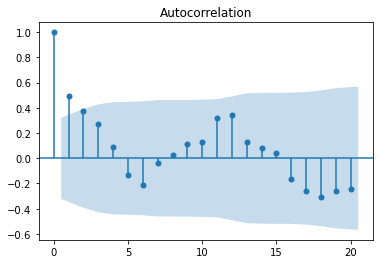

In [6]:
acf_plot = plot_acf(vimana_df.demand,lags=20)

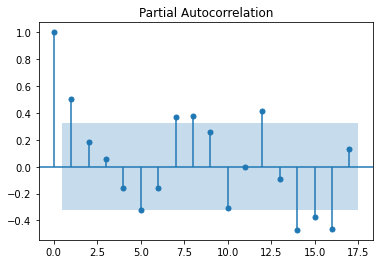

In [11]:
pacf_plot = plot_pacf(vimana_df.demand,lags=17)

### Building the ARIMA model

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
import numpy as np

In [23]:
test = np.array(vimana_df.demand[0:30].astype(np.float64))



NameError: name 'typeof' is not defined

In [24]:
arima = ARIMA(test,order=(1,0,0))

arima_model = arima.fit()

/Users/amithmg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [25]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                     ARMA(1, 0)   Log Likelihood                -182.765
Method:                       css-mle   S.D. of innovations            106.593
Date:                Mon, 09 May 2022   AIC                            371.530
Time:                        07:11:43   BIC                            375.734
Sample:                             0   HQIC                           372.875
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4412     35.915     14.296      0.000     443.050     583.833
ar.L1.y        0.4726      0.158      3.000      0.003       0.164       0.781
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1161           +0.0000j            2.1161            0.0000
-----------------------------------------------------------------------------
"""

### Forecast for next 6 months

In [26]:
forecast_31_37 = arima_model.predict(30,36)

In [27]:
forecast_31_37

array([480.15233644, 497.70966955, 506.00685825, 509.92791732,
       511.78091896, 512.65660458, 513.07043331])

In [28]:
def get_mape(actual, predicted):
    y_ture, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/actual))*100,2)

In [29]:
get_mape(vimana_df.demand[30:],
        forecast_31_37)

19.12

### moving average method

In [30]:
arima_ma = ARIMA(vimana_df.demand[0:30].astype(np.float64),order=(0,0,1))

arima_ma_model=arima_ma.fit()

arima_ma_model.summary()

/Users/amithmg/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 demand   No. Observations:                   30
Model:                     ARMA(0, 1)   Log Likelihood                -184.297
Method:                       css-mle   S.D. of innovations            112.453
Date:                Mon, 09 May 2022   AIC                            374.595
Time:                        09:17:28   BIC                            378.798
Sample:                             0   HQIC                           375.939
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          516.5435     26.831     19.252      0.000     463.956     569.131
ma.L1.demand     0.3173      0.142      2.233      0.026       0.039       0.596
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -3.1518           +0.0000j            3.1518            0.5000
-----------------------------------------------------------------------------
"""